In [110]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [123]:
points = pd.read_csv('../data/points.csv')

points.head()

,point,x,y,z
0,point_0,1588887.00,6803991.5,0.6
1,point_1,1588886.50,6803988.0,0.6
2,point_2,1588886.25,6803985.0,0.6
3,point_3,1588885.75,6803982.0,0.6
4,point_4,1588885.50,6803979.5,0.6


In [124]:
ldf = pd.read_csv('../data/lines.csv')

ldf = ldf.divide(1000000)

line_list = []

def push_to_line_list(row):
    line = ([row['x1'], row['x2']], [row['y1'], row['y2']])
    line_list.append(line)

ldf.apply(lambda row: push_to_line_list(row), axis=1)
    

ldf.head()

,x1,y1,z1,x2,y2,z2
0,1.589114,6.804011,0.000000e+00,1.589114,6.804011,0.000000e+00
1,1.589114,6.804011,0.000000e+00,1.589111,6.804012,-2.220446e-22
2,1.589148,6.803997,2.220446e-22,1.589125,6.804007,0.000000e+00
3,1.589125,6.804007,0.000000e+00,1.589126,6.804011,-1.110223e-22
4,1.589145,6.803916,0.000000e+00,1.589142,6.803919,0.000000e+00


In [125]:
raw = pd.read_csv('../data/radiation.txt')

num_points = raw.shape[1] -1
columns = []

for point in range(num_points):
    columns.append('point_{}'.format(str(point)))
    
columns.append('date_time')

df = pd.read_csv('../data/radiation.txt', names=columns)
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

df = pd.melt(df, value_vars=columns[:-1], id_vars=columns[-1])
df.columns = ['date_time', 'point', 'kWh']

df['kWh'] = pd.to_numeric(df['kWh'], errors='coerce')
df = df.drop_duplicates()
df = pd.merge(df, points, on='point')
df.head()
# df.dtypes

,date_time,point,kWh,x,y,z
0,2018-02-21 08:00:00,point_0,0.000000,1588887.0,6803991.5,0.6
1,2018-03-21 08:00:00,point_0,0.000000,1588887.0,6803991.5,0.6
2,2018-04-21 08:00:00,point_0,0.000000,1588887.0,6803991.5,0.6
3,2018-05-21 08:00:00,point_0,0.010942,1588887.0,6803991.5,0.6
4,2018-06-21 08:00:00,point_0,0.007826,1588887.0,6803991.5,0.6


In [126]:
df['month'] = df['date_time'].dt.strftime("%B")
df['hour'] = df['date_time'].dt.hour

df.head()

,date_time,point,kWh,x,y,z,month,hour
0,2018-02-21 08:00:00,point_0,0.000000,1588887.0,6803991.5,0.6,February,8.0
1,2018-03-21 08:00:00,point_0,0.000000,1588887.0,6803991.5,0.6,March,8.0
2,2018-04-21 08:00:00,point_0,0.000000,1588887.0,6803991.5,0.6,April,8.0
3,2018-05-21 08:00:00,point_0,0.010942,1588887.0,6803991.5,0.6,May,8.0
4,2018-06-21 08:00:00,point_0,0.007826,1588887.0,6803991.5,0.6,June,8.0


In [127]:
grouped = df.groupby(['month', 'hour'])['kWh']

summed = grouped.sum().reset_index()
meaned = grouped.mean().reset_index()

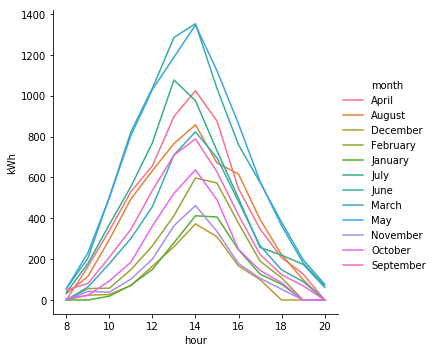

In [128]:
sns.relplot(x="hour", y="kWh", hue="month",
            kind="line", legend="full", data=summed)#.settitle('Hourly Summed Radiaton per Month')

In [129]:
monthly_average = df.groupby(['month', 'hour', 'x', 'y', 'z'])['kWh'].mean().reset_index()



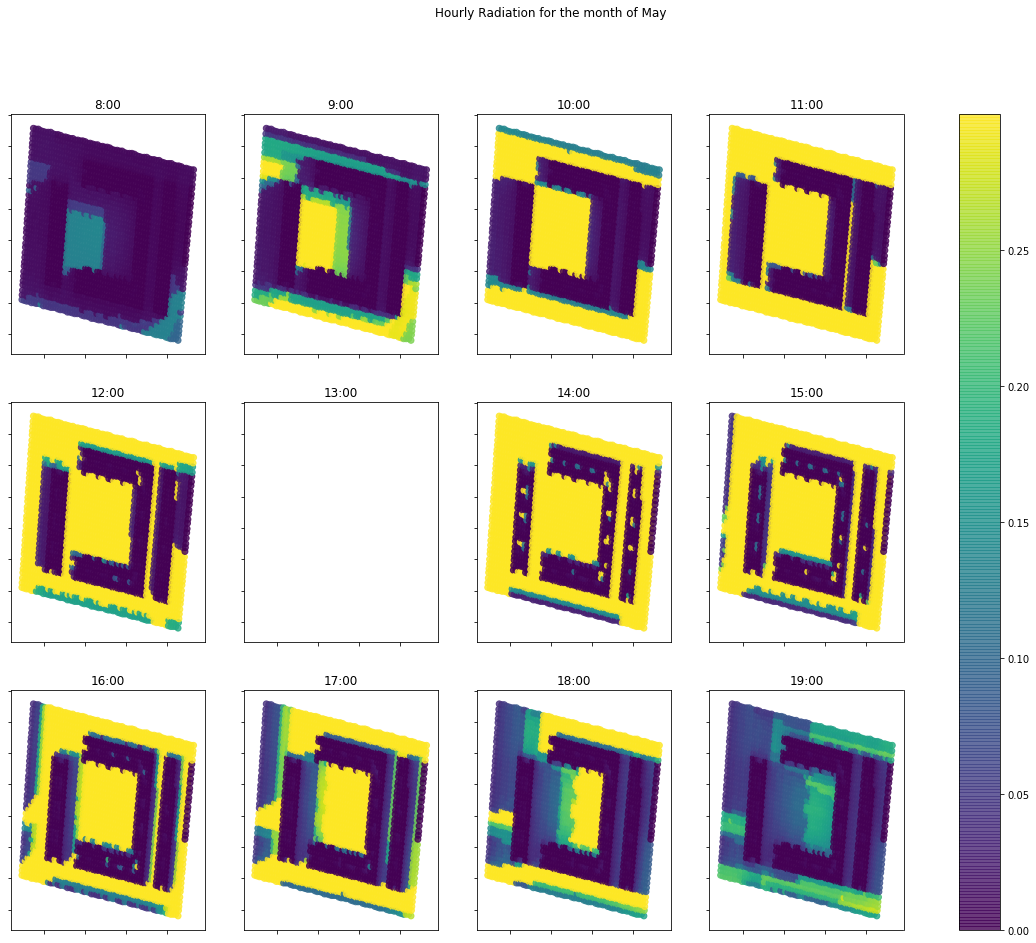

In [137]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines as lines

month = 'May'

mdf = monthly_average[monthly_average['month'] == month]

fig, ax = plt.subplots(3, 4, figsize=(20,15), sharex='col', sharey='row')

def add_lines(ax, line_list):
    ls = []
    for line in line_list:
        ax.plot(line[1], line[0], '-k')

# axes are in a two-dimensional array, indexed by [row, col]
hour = 7
for i in range(3):
    for j in range(4):
        hour+=1
        subdf = mdf[mdf['hour'] == hour]
        
        im = ax[i,j].scatter(subdf['x'], subdf['y'], alpha = .8, c = subdf['kWh'], cmap = 'viridis', vmin=0, vmax=0.3)
        ax[i,j].set_yticklabels([])
        ax[i,j].set_xticklabels([])
        ax[i,j].set_title('{}:00'.format(hour))
#         add_lines(ax[i,j], line_list)

fig.colorbar(im, ax=ax)
fig.suptitle('Hourly Radiation for the month of {}'.format(month))
fig.savefig('test.png')

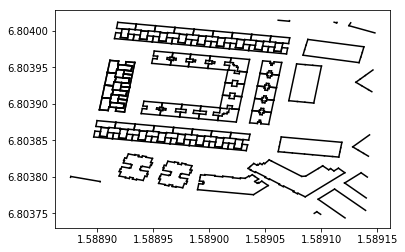

In [133]:
def add_lines(ax, line_list):
    ls = []
    for line in line_list:
        ax.plot(line[0], line[1], '-k')

fig, ax = plt.subplots()

# ls = []

# for line in line_list:
#     ls.append(lines.Line2D(line[0], line[1], c='red'))

# fig.lines = ls
    
add_lines(ax, line_list)

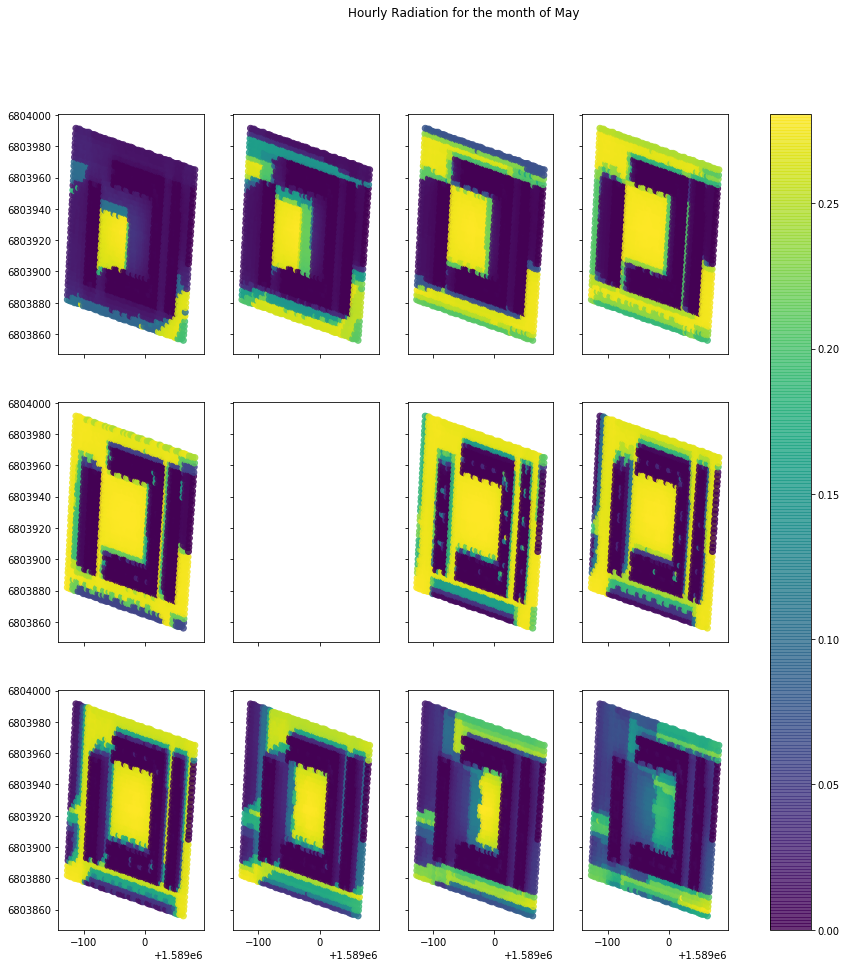

In [120]:
fig, ax = plt.subplots(3, 4,figsize=(15,15), sharex='col', sharey='row')

# axes are in a two-dimensional array, indexed by [row, col]
hour = 7
for i in range(3):
    for j in range(4):
        hour+=1
        subdf = mdf[mdf['hour'] == hour]
        
        im = ax[i,j].scatter(subdf['x'], subdf['y'], alpha = .8, c = subdf['kWh'], cmap = 'viridis')

fig.colorbar(im, ax=ax)
fig.suptitle('Hourly Radiation for the month of {}'.format(month))
fig.savefig('test.png')

In [38]:
mdf['hour'].head()

3      8.0
15     9.0
27    10.0
39    11.0
51    12.0
Name: hour, dtype: float64

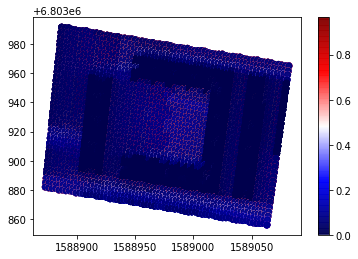

In [14]:
plt.scatter(mdf.x, mdf.y, alpha = .8, c = mdf.kWh, cmap = 'seismic')
cbar = plt.colorbar()

In [20]:
g = sns.FacetGrid(mdf, col='hour')

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 7
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(facet_scatter, 'sepal_length', 'sepal_width', "petal_length",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

NameError: name 'iris' is not defined